### Task B: Clustering: Wine Dataset

Import libraries

In [61]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

Load wine dataset

In [62]:
wine_df = pd.read_csv('wine.csv')
wine_df.head()
# wine_df.columns

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Normalise data

In [63]:
#normalise
from sklearn.preprocessing import StandardScaler
x = wine_df.values[:,1:] # all rows, and all columns except the first one i.e the index
x = np.nan_to_num(x) # handle missing values... replace NaN with zero... 
normalised_dataset = StandardScaler().fit_transform(x)
normalised_dataset

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Apply K-means clustering

In [64]:
num_of_clusters = 3
k_means = KMeans(init='k-means++', n_clusters=num_of_clusters, n_init= 12)
k_means.fit(normalised_dataset)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Assign labels to each row in the dataframe

In [65]:
#assign labels to each row in the dataframe
wine_df["cluster_km"] = labels
wine_df.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,cluster_km
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


Centroid values by averaging the features in each cluster.

In [66]:
#Centroid values by averaging the features in each cluster.
wine_df.groupby('cluster_km').mean()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
cluster_km,,,,,,,,,,,,,,
0,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
2,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


Show distribution of clusters based on wine, and alcohol  

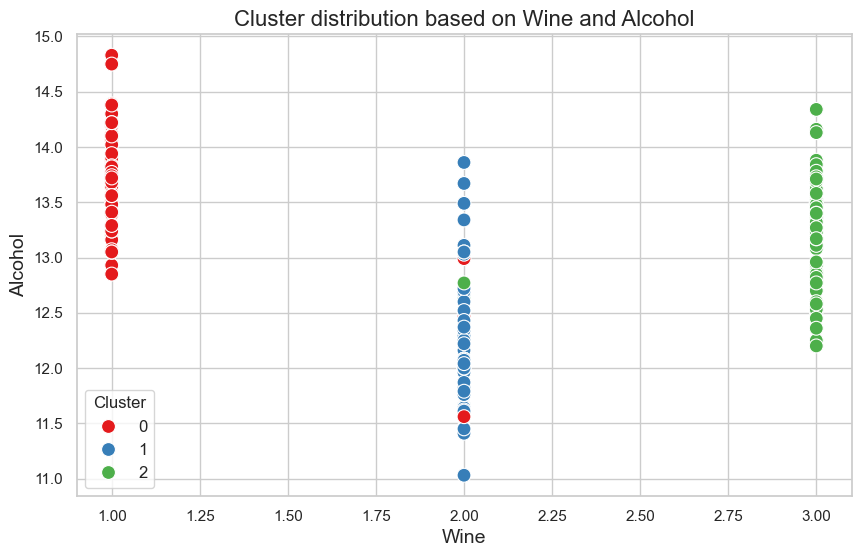

In [67]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wine_df, x='Wine', y='Alcohol', hue='cluster_km', palette='Set1', s=100)

# Adding titles and labels
plt.title('Cluster distribution based on Wine and Alcohol', fontsize=16)
plt.xlabel('Wine', fontsize=14)
plt.ylabel('Alcohol', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
plt.show()

3d plot wine, alcohol, malic.acid

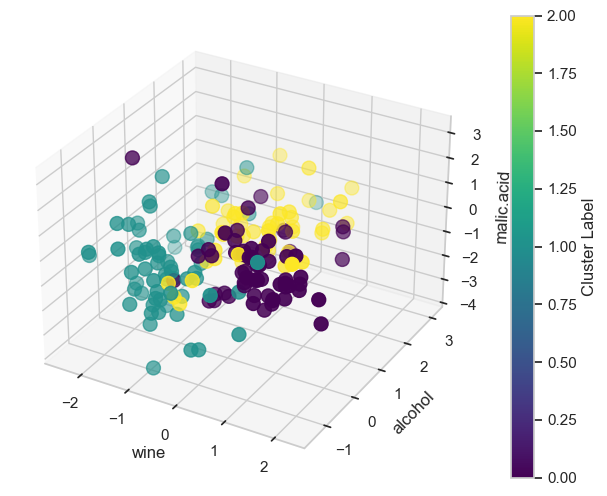

In [68]:
# Create the figure and add 3D axes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Set labels for axes
ax.set_xlabel('wine')
ax.set_ylabel('alcohol')
ax.set_zlabel('malic.acid')

# Create a scatter plot
scatter = ax.scatter(normalised_dataset[:, 0], normalised_dataset[:, 1], normalised_dataset[:, 2], c=labels, cmap='viridis', s=100)

# Create a color bar
plt.colorbar(scatter, label='Cluster Label')

# Show the plot
plt.show()

Compare clusters with wine

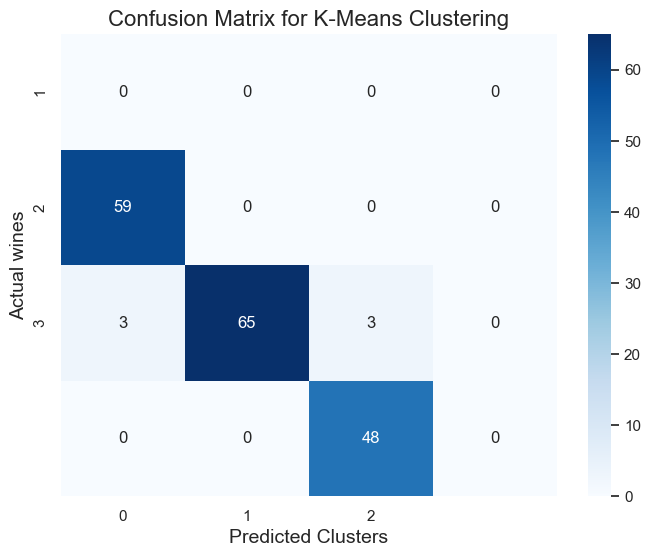

In [69]:
wine = wine_df['Wine'].values  # Extract actual species labels and compare
# Create a confusion matrix
conf_matrix = confusion_matrix(wine, labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(wine))
plt.title('Confusion Matrix for K-Means Clustering', fontsize=16)
plt.xlabel('Predicted Clusters', fontsize=14)
plt.ylabel('Actual wines', fontsize=14)
plt.show()